<a href="https://colab.research.google.com/github/ckalo23/csc446_AI/blob/main/CSC446_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 4.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=3e697153ad6141083a7d924d731ba7f0679869fb8b7066778acdc57229687a40
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

1. Draw the Fuzzy Models for this system.
    
    i. The inputs are as follows: 
        1. Distance: Far (begins roughly > 150 feet), moderately far, 
        moderately close, and close (begins roughly < 30 feet) 		
        2. Relative Speed:  closing fast, closing slowly, neutral, receding
        slowly, receding quickly.  Make the fast relative speeds > 20 mph,
        the neutral to cover roughly +/- 5 mph and the slow relative speeds
        to fill the gaps.  	
    ii. The output is as follows: 
        1. Decelerate quickly, decelerate slowly, maintain speed, accelerate
        slowly, and accelerate quickly.   Make slow decelerations centered each
        on +/- .2g and the maintain speed is centered on 0 g.

In [187]:
distance = ctrl.Antecedent(np.arange(0,180,.1), 'distance')
rel_speed = ctrl.Antecedent(np.arange(-40,40,.1), 'rel_speed')
accelerate = ctrl.Consequent(np.arange(-1,1,.01), 'accelerate')

In [188]:
distance['f'] = fuzz.trimf(distance.universe, [130,180,180]) 
distance['mf'] = fuzz.trimf(distance.universe, [75,115,155]) 
distance['mc'] = fuzz.trimf(distance.universe, [25,65,105]) 
distance['c'] = fuzz.trimf(distance.universe, [0,0,50]) 

In [189]:
rel_speed['cf'] = fuzz.trimf(rel_speed.universe, [15,40,40]) 
rel_speed['cs'] = fuzz.trimf(rel_speed.universe, [5,12.5,20]) 
rel_speed['n'] = fuzz.trimf(rel_speed.universe, [-5.1,0,5.1]) 
rel_speed['rs'] = fuzz.trimf(rel_speed.universe, [-20,-12.5,-5]) 
rel_speed['rf'] = fuzz.trimf(rel_speed.universe, [-40,-40,-15]) 

In [190]:
accelerate['df'] = fuzz.trimf(accelerate.universe, [-1,-1,-.6]) 
accelerate['ds'] = fuzz.trimf(accelerate.universe, [-.9,-.5,-.1]) 
accelerate['m'] = fuzz.trimf(accelerate.universe, [-.2,0,.2]) 
accelerate['as'] = fuzz.trimf(accelerate.universe, [.1,.5,.9]) 
accelerate['af'] = fuzz.trimf(accelerate.universe, [.6,1,1]) 

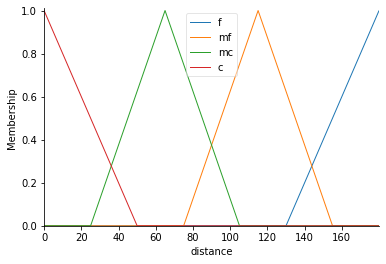

In [181]:
distance.view()

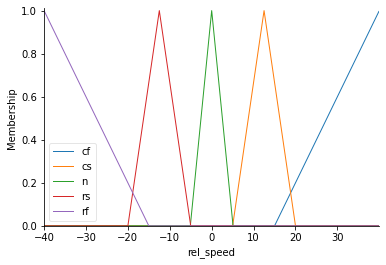

In [185]:
rel_speed.view()

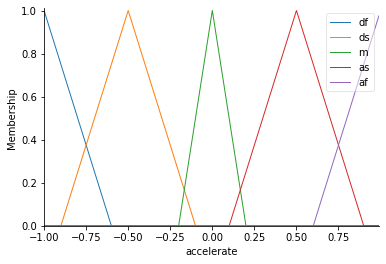

In [124]:
accelerate.view()

2. Develop a complete set of rules and complete the Fuzzy Associative Matrix.
    
    i. Undergrads:
        Use only the distance input
    ii. Grads:
        Use both inputs 

> Rules for pairs of **distance** = *far* and corresponding **relative speed**, resulting in output for **accelerate**.

In [216]:
rule1_1 = ctrl.Rule(distance['f'] & rel_speed['cf'], accelerate['ds'])
rule1_2 = ctrl.Rule(distance['f'] & rel_speed['cs'], accelerate['m'])
rule1_3 = ctrl.Rule(distance['f'] & rel_speed['n'], accelerate['as'])
rule1_4 = ctrl.Rule(distance['f'] & rel_speed['rs'], accelerate['af'])
rule1_5 = ctrl.Rule(distance['f'] & rel_speed['rf'], accelerate['af'])

> Rules for pairs of **distance** = *moderately far* and corresponding **relative speed**, resulting in output for **accelerate**.

In [217]:
rule2_1 = ctrl.Rule(distance['mf'] & rel_speed['cf'], accelerate['ds'])
rule2_2 = ctrl.Rule(distance['mf'] & rel_speed['cs'], accelerate['m'])
rule2_3 = ctrl.Rule(distance['mf'] & rel_speed['n'], accelerate['m'])
rule2_4 = ctrl.Rule(distance['mf'] & rel_speed['rs'], accelerate['as'])
rule2_5 = ctrl.Rule(distance['mf'] & rel_speed['rf'], accelerate['af'])

> Rules for pairs of **distance** = *moderately close* and corresponding **relative speed**, resulting in output for **accelerate**.

In [218]:
rule3_1 = ctrl.Rule(distance['mc'] & rel_speed['cf'], accelerate['df'])
rule3_2 = ctrl.Rule(distance['mc'] & rel_speed['cs'], accelerate['ds'])
rule3_3 = ctrl.Rule(distance['mc'] & rel_speed['n'], accelerate['m'])
rule3_4 = ctrl.Rule(distance['mc'] & rel_speed['rs'], accelerate['m'])
rule3_5 = ctrl.Rule(distance['mc'] & rel_speed['rf'], accelerate['as'])

> Rules for pairs of **distance** = *close* and corresponding **relative speed**, resulting in output for **accelerate**.

In [219]:
rule4_1 = ctrl.Rule(distance['c'] & rel_speed['cf'], accelerate['df'])
rule4_2 = ctrl.Rule(distance['c'] & rel_speed['cs'], accelerate['df'])
rule4_3 = ctrl.Rule(distance['c'] & rel_speed['n'], accelerate['ds'])
rule4_4 = ctrl.Rule(distance['c'] & rel_speed['rs'], accelerate['m'])
rule4_5 = ctrl.Rule(distance['c'] & rel_speed['rf'], accelerate['as'])

3. Demonstrate the execution of the Fuzzy System
    
    i. Think up 2 input situations, for example:
        1. Entering a freeway with a car far in front of you going at freeway
        speed and you are going slower (you want to get up to freeway speed),
        2. Maintaining distance (you want to maintain a moderate distance and
        near zero relative speed),
        3. Coming up to a freeway backup (you were going at full speed and the
        cars in front of you are all stopped and the relative distance is
        closing fast), and
        4. a car in front of you exited and now you want to close the gap with
        the next car in front of you (its distance is now farther than the
        desired following distance but it is also at freeway speed).
        5. You can think up any other situations too, these are just examples
        if you are stumped.
    ii. Draw the output fuzzy sets based on the rules that get fired from above
    and their relative amplitudes
    
    iii. Use the Centroid method and compute the final de-fuzzified output for
    each of these as to what the actual value for the deceleration/acceleration
    should be.

In [220]:
acceleration_ctrl = ctrl.ControlSystem([rule1_1, rule1_2, rule1_3, rule1_4, rule1_5, 
                                        rule2_1, rule2_2, rule2_3, rule2_4, rule2_5, 
                                        rule3_1, rule3_2, rule3_3, rule3_4, rule3_5, 
                                        rule4_1, rule4_2, rule4_3, rule4_4, rule4_5])
acceleration = ctrl.ControlSystemSimulation(acceleration_ctrl)

> Situation #1 - Merging on freeway w/ car ahead, which is accelerating much faster

In [231]:
acceleration.input['distance'] = 40
acceleration.input['rel_speed'] = -25
acceleration.compute()

0.5


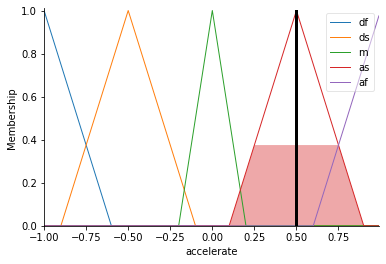

In [232]:
accelerate.view(sim=acceleration)
print(acceleration.output['accelerate'])

> Situation #2 - maintain mod. distance, near-zero rel. speed

In [223]:
acceleration.input['distance'] = 90.0
acceleration.input['rel_speed'] = 1.0
acceleration.compute()

8.006416042969877e-18


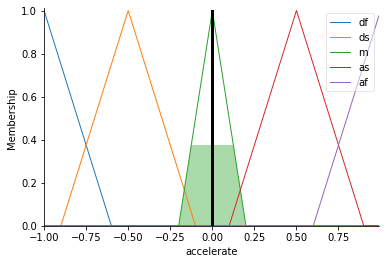

In [224]:
accelerate.view(sim=acceleration)
print(acceleration.output['accelerate'])

> Situation #3 - freeway backup merge, closing fast

In [225]:
acceleration.input['distance'] = 75.0
acceleration.input['rel_speed'] = 40.0
acceleration.compute()

-0.8600000000000005


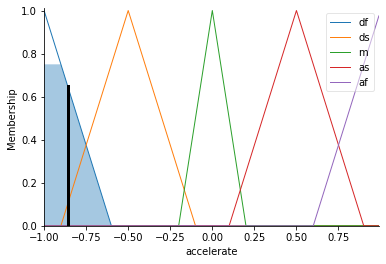

In [226]:
accelerate.view(sim=acceleration)
print(acceleration.output['accelerate'])

> Situation #4 - car leaves.. you close gap to next car, further distance, right speed

In [227]:
acceleration.input['distance'] = 150.0
acceleration.input['rel_speed'] = 0.0
acceleration.compute()

0.429702393560686


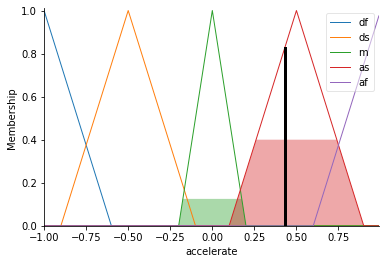

In [228]:
accelerate.view(sim=acceleration)
print(acceleration.output['accelerate'])

In [229]:
acceleration.input['distance'] = 100.0
acceleration.input['rel_speed'] = 5.0
acceleration.compute()

-4.23069796518725e-12


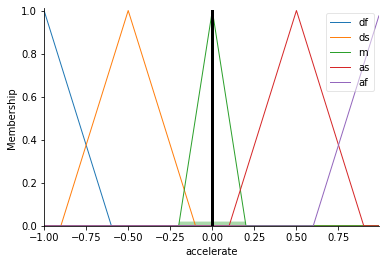

In [230]:
accelerate.view(sim=acceleration)
print(acceleration.output['accelerate'])